In [1]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [2]:
#Use SQLAlchemy create_engine to connect to your sqlite database.
engine = create_engine("sqlite:///hawaii.sqlite", echo=False)

In [3]:
#Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station 
#and Measurement.
inspector = inspect(engine)
inspector.get_table_names()

['measurements', 'stations']

In [4]:
columns = inspector.get_columns('measurements')
for c in columns:
    print(c['name'], c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs INTEGER


In [5]:
columns = inspector.get_columns('stations')
for c in columns:
    print(c['name'], c['type'])

station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [6]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Station = Base.classes.stations
Measurement = Base.classes.measurements

In [7]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [8]:
session = Session(engine)

In [9]:
# Get the last date of entry
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [10]:
#Design a query to retrieve the last 12 months of precipitation data.
one_yr_prcp = session.query(Measurement.date, Measurement.prcp).\
                        filter(Measurement.date > '2016-08-23').\
                        order_by(Measurement.date).all()

In [11]:
# Load the results into a pandas dataframe.

precipitation_df = pd.DataFrame(one_yr_prcp, columns=['date', 'prcp'])

# Change the date to a datetime format.
precipitation_df['date'] = pd.to_datetime(precipitation_df['date'], format='%Y/%m/%d')

#Reset the index to the 'Date'
precipitation_df.set_index(precipitation_df['date'])
precipitation_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,1.22
4,2016-08-24,2.15


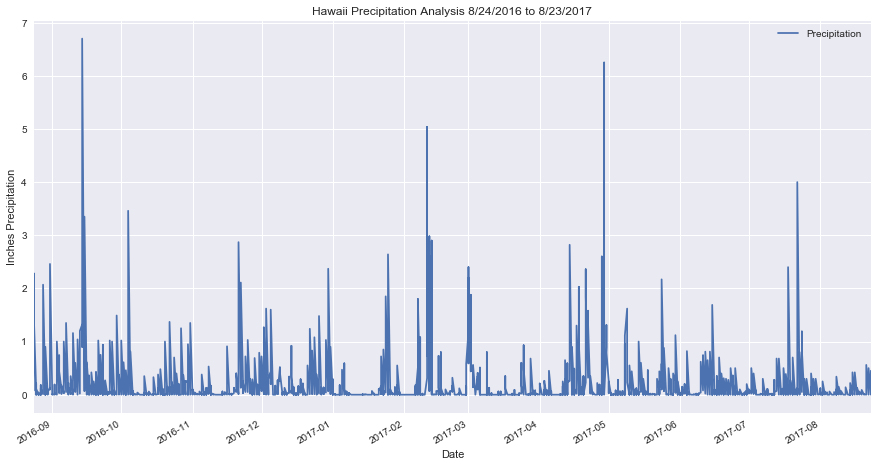

In [12]:
#Plot the results using the DataFrame plot method.
precipitation_df.plot('date', 'prcp', figsize=(15, 8))
plt.xlabel("Date")
plt.ylabel("Inches Precipitation")
plt.title("Hawaii Precipitation Analysis 8/24/2016 to 8/23/2017")
plt.legend(["Precipitation"])
plt.savefig("precipitation.png")
#plt.tight_layout()
plt.show()

In [13]:
#Use Pandas to print the summary statistics for the precipitation data.
precipitation_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000
